#### Pandas DataFrame

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from faker import Faker
fake = Faker()

num_obs = 2000
data = pd.DataFrame(np.random.randn(num_obs*2).reshape(num_obs,2), columns=["Return","Px"], index=[fake.date_time_between_dates(
    datetime_start=datetime(2020, 3, 13, 14, 58, 57), 
    datetime_end=datetime(2020, 3, 20, 14, 58, 57), 
    tzinfo=None)
    for x in range(num_obs)]).sort_index()
data.Px = np.abs(data.Px)+10.0

In [ ]:
# read_csv allows one to use a regular expression as a separator!!!

In [ ]:
# iloc + get_loc + between_time
print(type(data.columns))
print(data.iloc[-1,data.columns.get_loc("Return")]-data.iloc[0,data.columns.get_loc("Return")])
print(data.between_time('08:30','16:00').shape)
print(data.loc['2020-03-13 08:30':'2020-03-20 16:00'].shape)
# print(data.between_time('2020-03-13 08:30:00','2020-03-20 16:00:00').shape)  # between_time does not work with datetime

<class 'pandas.core.indexes.base.Index'>
1.1621653462959602
(622, 2)
(2000, 2)


In [ ]:
d2 = data.reset_index(drop=True)

In [ ]:
print(d2[:2])
print(d2.loc[:2])  # slicing and loc is NOT the same!!! loc is inclusive, slicing is exclusive!!

     Return         Px
0  0.304877  10.312160
1  0.229716  10.068255
     Return         Px
0  0.304877  10.312160
1  0.229716  10.068255
2  1.602424  10.107778


In [ ]:
print(d2[1:3])
print(d2.loc[1:3])  # slicing and loc is NOT the same!!! loc is inclusive, slicing is exclusive!!

     Return         Px
1  0.229716  10.068255
2  1.602424  10.107778
     Return         Px
1  0.229716  10.068255
2  1.602424  10.107778
3  3.244704  10.119440


In [ ]:
print(d2[-3:-1])
print(d2.loc[-3:-1])  # slicing and loc is NOT the same!!! loc does not work backwards, slicing does!!

        Return         Px
1997  1.145733  11.122660
1998 -0.109619  10.000796
Empty DataFrame
Columns: [Return, Px]
Index: []


In [ ]:
d2.loc[d2.sample(4).index,'Return'] = np.nan # assign NaN to Return in random rows

In [ ]:
d2.isnull().sum()  # count NaNs in each column

Return    4
Px        0
dtype: int64

In [ ]:
print(d2.loc[d2['Return'].isnull()])
print(d2[d2['Return'].isnull()])

      Return         Px
209      NaN  10.415659
813      NaN  10.266553
1098     NaN  11.024299
1434     NaN  10.680241
      Return         Px
209      NaN  10.415659
813      NaN  10.266553
1098     NaN  11.024299
1434     NaN  10.680241


In [ ]:
rets =  d2['Return']  # creates a copy of the column
print(rets.isnull().sum())
# rets.fillna(method='ffill')  #  'bfill'
rets = rets.interpolate('linear') # interpolate NaNs, other methods: 'polynomial', 'spline', 'piecewise_polynomial', 'from_derivatives', etc.
print(rets.isnull().sum())

4
0


In [ ]:
rets.loc[d2['Return'].isnull()]

209    -0.775189
813    -0.836969
1098   -0.192603
1434    0.589722
Name: Return, dtype: float64

In [ ]:
d2[d2['Return'].isnull()]

,Return,Px
209,NaN,10.415659
813,NaN,10.266553
1098,NaN,11.024299
1434,NaN,10.680241


In [ ]:
%timeit d2['Return']  # extract a column as a Series whenever you can, NEVER as a DataFrame

3.04 μs ± 28.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [ ]:
%timeit d2[['Return']]  

239 μs ± 3.06 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
# d2[['Return']].applymap(lambda x: x>0.0)  # deprecated!
print(d2[['Return']].map(lambda x: x>0.0).shape)
print(d2[['Return']].map(lambda x: x>0.0).isnull().sum())
d2[d2['Return'].isnull()].map(lambda x: x>0.0)  # [['Return']]

(2000, 1)
Return    0
dtype: int64


,Return,Px
209,False,True
813,False,True
1098,False,True
1434,False,True


In [ ]:
print(pd.concat([d2[d2['Return'].isnull()].map(lambda x: x>0.0),d2[d2['Return'].isnull()].map(lambda x: x>0.0)]).shape) # vertical concat is default!
print(pd.concat([d2[d2['Return'].isnull()].map(lambda x: x>0.0),d2[d2['Return'].isnull()].map(lambda x: x>0.0)], axis=1).shape) 

(8, 2)
(4, 4)


In [ ]:
from pandas.errors import DuplicateLabelError
tt1 = pd.concat([d2[d2['Return'].isnull()].map(lambda x: x>0.0),d2[d2['Return'].isnull()].map(lambda x: x>0.0)], axis=1).set_flags(allows_duplicate_labels=True)  # allows duplicate labels
print(tt1.shape)    
try:
    pd.concat([d2[d2['Return'].isnull()].map(lambda x: x>0.0),d2[d2['Return'].isnull()].map(lambda x: x>0.0)], axis=1).set_flags(allows_duplicate_labels=False)  # allows duplicate labels
except DuplicateLabelError as dle:
    print(str(dle))

(4, 4)
Index has duplicates.
       positions
label           
Return    [0, 2]
Px        [1, 3]


In [ ]:
dr

,Return,Px,Group1,Group2
1337,0.003467,11.188976,C,X
790,1.911722,10.229155,B,Y
952,0.157580,10.490487,C,Y
1160,-2.088062,10.001599,C,X
340,-0.183412,10.463449,D,X
1781,0.349690,10.537090,C,X


In [ ]:
t1 = d2[d2['Return'].isnull()].map(lambda x: x>0.0)
t2 = t1[:]
t3 = t1[:]
t2.index = t1.index + 100

In [ ]:
print(pd.concat([t1,t3], axis=1))
print(pd.concat([t1,t3])) # indices are duplicated!

      Return    Px  Return    Px
227    False  True   False  True
655    False  True   False  True
1874   False  True   False  True
1909   False  True   False  True
      Return    Px
227    False  True
655    False  True
1874   False  True
1909   False  True
227    False  True
655    False  True
1874   False  True
1909   False  True


In [ ]:
print(pd.concat([t1,t2], axis=1).shape)  # indices are forced to be unique!!!
print(pd.concat([t1,t2], axis=1, ignore_index=True).shape)  # even with ignore index, it ignores the columns! not the rows!!!
print(pd.concat([t1,t2]).shape) # indices are duplicated!

(8, 4)
(8, 4)
(8, 2)


In [ ]:
import random
d2['Group1'] = random.choices(['A','B','C','D'],k=d2.shape[0]) 
d2['Group2'] = random.choices(['X','Y'],k=d2.shape[0]) 

In [ ]:
d2_summary = d2.groupby(['Group1','Group2']).agg(
    AvgReturn = ('Return', 'mean'), 
    MaxReturn = ('Return','max')
    )  # agg is used to apply multiple functions to a single column - this is how to do it correctly!
d2_summary

AvgReturn  MaxReturn
Group1 Group2                      
A      X        0.012218   2.903061
       Y       -0.113825   2.406474
B      X        0.009982   2.422189
       Y        0.022770   2.765758
C      X       -0.022896   2.859746
       Y       -0.094801   2.730803
D      X        0.030944   2.991305
       Y        0.115251   2.949368

In [ ]:
d2_summary = d2.groupby(['Group1','Group2']).agg({'Return':['mean','min','max'],'Px': 'mean'}).reset_index()  # agg is a groupby method with multiple aggregations that are different for each column
# d2_summary.columns = d2_summary.columns.to_flat_index()
# d2_summary.columns = ['_'.join(x) if x[-1]!='' else x[0] for x in d2_summary.columns]
d2_summary.columns = d2_summary.columns.map(lambda x: x[0] if x[-1]=='' else '_'.join(x))  # flatten multiindex using lambda
d2_summary


,Group1,Group2,Return_mean,Return_min,Return_max,Px_mean
0,A,X,0.012218,-2.692912,2.903061,10.759754
1,A,Y,-0.113825,-3.269504,2.406474,10.766728
2,B,X,0.009982,-2.987788,2.422189,10.794995
3,B,Y,0.022770,-2.723919,2.765758,10.811915
4,C,X,-0.022896,-3.257854,2.859746,10.828891
5,C,Y,-0.094801,-2.793151,2.730803,10.812448
6,D,X,0.030944,-2.476319,2.991305,10.809297
7,D,Y,0.115251,-2.973890,2.949368,10.834034


In [ ]:
tx= d2.groupby(['Group1','Group2']).agg(
    AvgReturn = ('Return', 'mean'), 
    MaxReturn = ('Return','max')
    ).nlargest(4, 'AvgReturn')  # nlargest is a dataframe method that returns the n largest values of a column
tx

AvgReturn  MaxReturn
Group1 Group2                      
D      Y        0.115251   2.949368
       X        0.030944   2.991305
B      Y        0.022770   2.765758
A      X        0.012218   2.903061

In [ ]:
tx.stack().reset_index()  # stack is like melt, it can keep the index from before

,Group1,Group2,level_2,0
0,D,Y,AvgReturn,0.115251
1,D,Y,MaxReturn,2.949368
2,D,X,AvgReturn,0.030944
3,D,X,MaxReturn,2.991305
4,B,Y,AvgReturn,0.022770
5,B,Y,MaxReturn,2.765758
6,A,X,AvgReturn,0.012218
7,A,X,MaxReturn,2.903061


In [ ]:
tx.stack().unstack()

AvgReturn  MaxReturn
Group1 Group2                      
D      X        0.030944   2.991305
       Y        0.115251   2.949368
B      Y        0.022770   2.765758
A      X        0.012218   2.903061

In [ ]:
tx['Category'] = random.choices(['Aaa','Bbb'],k=tx.shape[0])

In [ ]:
tx['Category'].str.startswith('A')
tx['Category'].str.contains('b')
tx['Category'].str.split('b').map(''.join)
tx['Category'].str.replace('b','c')

Group1  Group2
D       Y         Aaa
        X         Bcc
B       Y         Aaa
A       X         Aaa
Name: Category, dtype: object

In [ ]:
rolling_object = d2[['Return','Px']].rolling(4) # a rolling object is created
expanding_object = d2[['Return','Px']].expanding(4) # an expanding object is created

array([<Axes: >, <Axes: >], dtype=object)

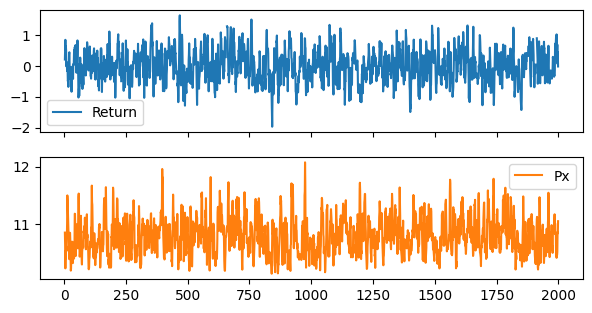

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [7, 3.5]
rolling_object.mean().plot(subplots=True)#.loc[0:8]

In [ ]:
print(rolling_object.mean().loc[0:7])
print([ d2.loc[0:(i),'Return'].mean() for i in range(4) ])
(d2.loc[0:3,'Return'].mean(),d2.loc[0:4,'Return'].mean())

     Return         Px
0       NaN        NaN
1       NaN        NaN
2       NaN        NaN
3  0.203647  10.849802
4  0.551281  10.647156
5  0.839681  10.225136
6  0.503198  10.532735
7  0.640365  10.400113
[-0.3927129579030407, -0.26489397164905754, 0.3656755728897971, 0.2036474366784506]


(0.2036474366784506, 0.36248222488283244)

In [ ]:
print(expanding_object.mean().loc[0:7])
print([ d2.loc[0:(i),'Return'].mean() for i in range(8) ])
# (d2.loc[0:3,'Return'].mean(),d2.loc[0:4,'Return'].mean())

     Return         Px
0       NaN        NaN
1       NaN        NaN
2       NaN        NaN
3  0.203647  10.849802
4  0.362482  10.693820
5  0.471489  10.610379
6  0.444260  10.709603
7  0.422006  10.624958
[-0.3927129579030407, -0.26489397164905754, 0.3656755728897971, 0.2036474366784506, 0.36248222488283244, 0.4714891697761899, 0.4442600797759189, 0.4220061301795834]


In [ ]:
tz = d2.drop(columns=[x for x in d2.columns if 'Group' in x]).sample(100)

In [ ]:
tz.rank()

,Return,Px
1260,80.0,93.0
409,84.0,86.0
1949,16.0,12.0
508,15.0,68.0
1963,49.0,30.0
...,...,...
1151,24.0,43.0
27,18.0,4.0
1368,82.0,58.0
1591,62.0,36.0


<Axes: >

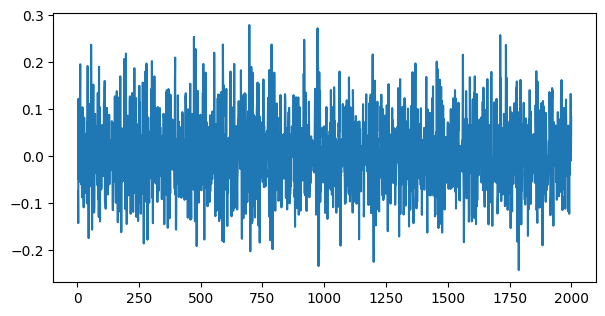

In [ ]:
d2['Px'].pct_change(periods=4).plot()

In [ ]:
g1 = ['C','D']
d2.query('Return>0.0 & Px<11 & Group1 in @g1')  # query is a method that allows to filter dataframes using a string

,Return,Px,Group1,Group2
2,1.626815,10.074555,C,X
4,0.997821,10.069890,D,Y
5,1.016524,10.193173,C,Y
19,0.602615,10.470418,C,X
24,0.243154,10.274267,C,Y
...,...,...,...,...
1981,0.362151,10.693847,D,X
1984,0.679583,10.955126,C,X
1986,0.696981,10.242722,C,X
1995,1.373798,10.172831,D,X


In [ ]:
# pd.read_csv has a parse_dates argument that can be used to parse dates e.g. parse_dates=['Date'] where Date is a column name

In [ ]:
import seaborn as sns
import webcolors

# Function to find the closest color name
def closest_color(requested_color):
    min_colors = {}
    for name in webcolors.names("css3"):
        # webcolors.name_to_hex(name)
        hex_string = webcolors.name_to_hex(name)
        r_c, g_c, b_c = webcolors.hex_to_rgb(hex_string)
        rd = (r_c - requested_color[0]) ** 2
        gd = (g_c - requested_color[1]) ** 2
        bd = (b_c - requested_color[2]) ** 2
        min_colors[(rd + gd + bd)] = name
    return min_colors[min(min_colors.keys())]


<Axes: title={'center': 'Title (2000, 4)'}, xlabel='Px', ylabel='Return'>

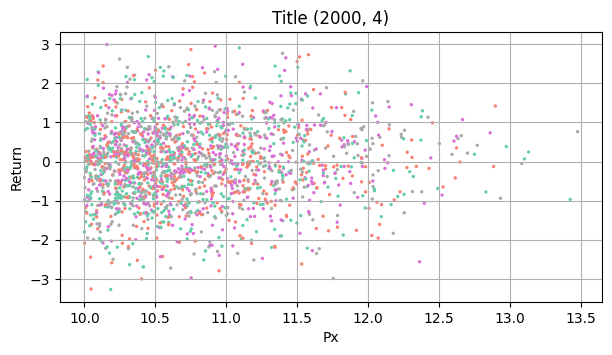

In [ ]:
import seaborn as sns
# Get a list of color names from a seaborn palette
palette = sns.color_palette("Set2")
# Convert the RGB tuples to hex color strings
named_colors = [closest_color((int(r * 255), int(g * 255), int(b * 255))) for r, g, b in palette]
cmap_used = {}
for i, group_name in enumerate(d2['Group1'].unique()):
    cmap_used[group_name] = named_colors[i]

d2.plot(kind='scatter', x='Px', y='Return', c=d2['Group1'].map(cmap_used), s=2, grid=True, title=f"Title {d2.shape}")  # scatter plot with color and size

In [ ]:
d2.sample(6)[['Px']].style.format("{:.3f}").background_gradient(cmap='Blues').text_gradient(cmap='CMRmap')  # style = background gradient, format 

,Px
1554,10.705
1031,10.534
383,10.790
1991,10.255
510,10.715
20,10.288


In [ ]:
# d2.sample?  # shows doc string
# d2.sample?? # shows source code

In [ ]:
%timeit d2['Return'][400:410]

21 μs ± 190 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [ ]:
%timeit d2['Return'].iloc[400:410]

22.5 μs ± 242 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [ ]:
%timeit d2['Return'].values[400:410]  # using values is faster than using iloc or using loc!!!!

4.6 μs ± 37 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [ ]:
%timeit d2['Return'].loc[400:409]

30.9 μs ± 546 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [ ]:
print(all(d2['Return'].values[400:410] == d2['Return'].iloc[400:410])) # iloc is NOT inclusive!! and neither is values slicing!
print(all(d2['Return'].values[400:410] == d2['Return'].loc[400:409])) # loc is inclusive and has 1 more value!

True
True


In [ ]:
%timeit d2.loc(axis=0)[2::2]  

25.8 μs ± 1.6 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [ ]:
%timeit d2.values[2::2]  # values is numpy so faster than loc or iloc

1.87 μs ± 7.16 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [ ]:
d2.loc(axis=0)[2::2].head(4)  # a loc(axis=0) is the best for a multiindex loc

,Return,Px
2,1.602424,10.107778
4,0.004173,11.762920
6,0.208734,10.708284
8,0.643773,11.130307


In [ ]:
d2.values[2::2][:4]

array([[1.60242421e+00, 1.01077782e+01],
       [4.17294914e-03, 1.17629203e+01],
       [2.08734180e-01, 1.07082839e+01],
       [6.43772570e-01, 1.11303070e+01]])

In [ ]:
dl = d2.sample(6)
dr = d2.sample(6)
print(dl)
print(dr)

        Return         Px Group1 Group2
465   1.234234  10.163841      B      X
137   0.273884  10.668599      C      Y
39    0.260702  10.449255      B      X
1943 -1.267077  10.967387      C      X
784   0.719162  11.200165      B      X
1655  1.715475  10.177524      D      Y
        Return         Px Group1 Group2
1852 -0.489396  10.054424      C      X
1502 -0.426654  10.293451      D      Y
1163 -0.773898  11.118232      D      Y
657   1.047823  10.937230      D      X
1894  0.079382  10.283726      D      Y
510  -1.090728  10.715183      C      X


In [ ]:
dl.merge(dr, 
         on=['Group1','Group2'], 
         how='inner', 
         suffixes=('_left','_right'), 
         validate="m:m")  # merge is like a join in SQL, inner means only common indices are kept

,Return_left,Px_left,Group1,Group2,Return_right,Px_right
0,-1.267077,10.967387,C,X,-0.489396,10.054424
1,-1.267077,10.967387,C,X,-1.090728,10.715183
2,1.715475,10.177524,D,Y,-0.426654,10.293451
3,1.715475,10.177524,D,Y,-0.773898,11.118232
4,1.715475,10.177524,D,Y,0.079382,10.283726


In [ ]:
# dl.merge(dr, on=['Group1','Group2'], how='inner', suffixes=('_left','_right'), validate="1:m") # checks if the merge is 1:m using the merge keys

In [ ]:
d2['Group1'] = d2['Group1'].astype('category')  # convert column to category type, this is useful for memory optimization and speed
d2['Group2'] = d2['Group2'].astype('category')

In [ ]:
d2.dtypes

Return     float64
Px         float64
Group1    category
Group2    category
dtype: object

In [ ]:
d2.query('Group1 == "A"').shape

(522, 4)

In [ ]:
# Do NOT mix standard python function with numpy functions e.g. sum(np.array([1,2,3])) because python will copy the numpy array in a python list and use its own ineffecient sum function
# numpy.reshape is faster than numpy.resize because it does not copy the data!! reshape just changes the header structure in the numpy array

In [ ]:
d2.memory_usage(deep=True).sum()/2**20  # memory usage in MB

0.0306396484375

In [ ]:
# a = pd.Series(["0825","12674","984"])
# a.astype(int)


a = pd.Series(["0825","126N4","984"])
# a.astype(int)

# Step 1: Convert the 'ID' column to numeric, forcing errors to NaN
b = pd.to_numeric(a, errors='coerce').dropna().astype(int)

b
# Step 3: Optionally, drop the temporary 'ID_numeric' column
# df_cleaned = df_cleaned.drop(columns=['ID_numeric'])



0    825
2    984
dtype: int32

#### Pandas Dask

In [ ]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar

In [ ]:
import random
d2['Group1'] = random.choices(['A','B','C','D'],k=d2.shape[0]) 
d2['Group2'] = random.choices(['X','Y'],k=d2.shape[0]) 

In [ ]:
dd2 = dd.from_pandas(d2, npartitions=4)  # convert a pandas dataframe to a dask dataframe with 4 partitions (will be slower than pandas because of overhead)

In [ ]:
 with ProgressBar():  # progress bar
    ddfr1 = (dd2.groupby(['Group1','Group2'])
        .agg(
            AvgReturn = ('Return', 'mean'),
            MaxPx = ('Px', 'max'),
            MinPx = ('Px', 'min')
            )
        .compute() 
        )  # compute is used to execute the dask task

[########################################] | 100% Completed | 115.84 ms


In [ ]:
ddfr1

AvgReturn      MaxPx      MinPx
Group1 Group2                                 
A      X        0.088405  12.801148  10.001903
D      Y       -0.135404  12.745833  10.000796
C      Y        0.053814  12.663293  10.002801
       X        0.025268  12.686171  10.003986
A      Y       -0.026262  12.653102  10.006678
D      X       -0.060316  12.480709  10.000195
B      X       -0.022231  13.214722  10.000813
       Y       -0.043340  12.916691  10.005653

#### sklearn CV

In [3]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets, linear_model, ensemble, metrics
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.base import is_classifier, is_regressor
from sklearn.utils.estimator_checks import check_estimator


In [5]:
import numpy as np  
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from sklearn.model_selection import (
    GroupKFold,
    GroupShuffleSplit,
    KFold,
    ShuffleSplit,
    StratifiedGroupKFold,
    StratifiedKFold,
    StratifiedShuffleSplit,
    TimeSeriesSplit,
)


In [9]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""
    print(f"Type: {type(cv).__name__}")
    # Generate the training/testing visualizations for each CV split
    _sum = 0 
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )
        print(f"With fold{ii}, Length of Testing Set is {np.sum(indices)}")
        _sum += np.sum(indices)
    print(f"Number Testing is preseved: {_sum}")
    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[0, 100],
    )
    
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

In [11]:
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit
cvs = [KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit]
n_points = 100
n_splits = 5
X = np.random.randn(100, 10)
percentiles_classes = [.1, .3, .6]
y = np.hstack([[ii] * int(100 * perc) for ii, perc in enumerate(percentiles_classes)])

for i, cv in enumerate(cvs):
    this_cv = cv(n_splits=n_splits)
    # plot_cv_indices(this_cv, n_splits, X, y, date_col=None)

In [13]:
# this_cv

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)

In [18]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit()
tscv

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)

In [15]:
X

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4],
       [1, 2],
       [3, 4]])

In [16]:
y

array([1, 2, 3, 4, 5, 6])

In [17]:
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[0]
  Test:  index=[1]
Fold 1:
  Train: index=[0 1]
  Test:  index=[2]
Fold 2:
  Train: index=[0 1 2]
  Test:  index=[3]
Fold 3:
  Train: index=[0 1 2 3]
  Test:  index=[4]
Fold 4:
  Train: index=[0 1 2 3 4]
  Test:  index=[5]


#### Basic metaclass

In [1]:
import types

In [3]:
class TestRules(type):
    def __new__(cls,
                name_of_class: str,
                baseclasses: tuple,
                attrs: dict
                ):
        cls_instance = super().__new__(cls, name_of_class, baseclasses, attrs)
        print(name_of_class)
        print(baseclasses)
        print(attrs)
        # EnforcedFunctions.run_functions_applied_to_class(cls_instance, baseclasses)
        return cls_instance


In [7]:
class Parent(metaclass = TestRules):
    parent_attribute = 10
    pass

class Child(Parent):
    child_attribute = 20
    pass

Parent
()
{'__module__': '__main__', '__qualname__': 'Parent', 'parent_attribute': 10}
Child
(<class '__main__.Parent'>,)
{'__module__': '__main__', '__qualname__': 'Child', 'child_attribute': 20}


In [8]:
a = Child()

In [11]:
AttributeError.__name__

'AttributeError'

In [10]:
BaseException.__name__

'BaseException'

#### Filters on sets

In [23]:
y = [1,2,3,4,5]
sum([x**2 for x in y])**0.5
# a = set([1,2,3,4,5])
# { x for x in a if x>3}
# set(filter(lambda x: x>3, a))

7.416198487095663

#### What is considered True and Equal

In [38]:
a = '2'
if a: print(1)
a = ''
if a: print(2)
a = []
if a: print(3)
a = [5]
if a: print(4)

1
4


In [ ]:
a = '1'
b = '12'
if a is b[0]:
    print(4)
if a == b[0]:
    print(44)
b = '1'
if a is b[0]:
    print(5)
if a == b[0]:
    print(55)
if a is b:
    print(6)
if a == b:
    print(66)
b = '3'
if a is b: # 'is' checks memory location (therefore types have to be the same)
    print(7)
if a == b: # '==' applies a '==' operator
    print(77)
print(type(a),type(b))

4
44
5
55
6
66
<class 'str'> <class 'str'>


#### Assigning within an immutable

In [1]:
a = ( 20, 30, list(range(3)))
print(a)
a[2].extend([9,10,11])
print(a)
a[2].append(22)
print(a)
try:    
    a[2] = range(3)
except TypeError as te:
    print(str(te))
print(a)

(20, 30, [0, 1, 2])
(20, 30, [0, 1, 2, 9, 10, 11])
(20, 30, [0, 1, 2, 9, 10, 11, 22])
'tuple' object does not support item assignment
(20, 30, [0, 1, 2, 9, 10, 11, 22])


#### Decorate a method in a class

In [26]:
def foo(func):
    def wrap(s): # I'd call this 'self' instead of 's' to remind us it's a reference to an instance
        func(s) # This is a function, not a method yet - so we need to pass in the reference
        s.ma() # This is a method, because you use attribute lookup on the object s to get it
    return wrap

class A:
    def ma(self):
        print("this is ma")
    @foo     # if the way foo wraps mb doesn't depend on some arg, don't use args here
    def mb(self):
        print("this is mb")


a = A()
a.mb()

this is mb
this is ma


#### Examine a method signature in code

In [41]:
import inspect

class MyClass:
    def example_method(self, *args, **kwargs):
        pass

def has_method_with_signature(instance, method_name, param_names):
    # Check if the method exists
    if not hasattr(instance, method_name):
        return False

    # Get the method
    method = getattr(instance, method_name)

    # Check if it's callable
    if not callable(method):
        return False

    # Get the signature
    sig = inspect.signature(method)
    parameters = sig.parameters

    # Check parameter names
    if set(list(parameters.keys())) != set(x for x in param_names):
        print(list(parameters.keys()))
        return False

    return True

# Usage
instance = MyClass()
result = has_method_with_signature(instance, 'example_method', ['kwargs', 'args'])
print(result)  # Outputs: True

True


#### list equality, pop

In [39]:
print([1,2,3,4] == [4,3,2,1],set([1,2,3,4]) == set([4,3,2,1]))

False True


In [15]:
a =  [4,3,2,1]
print(a.pop(0))
print(a)
sum(a)/len(a)

4
[3, 2, 1]


2.0

#### partial with bound first argment, taking in *args, **kwargs

In [6]:
import sys
# sys.version
sys.version_info

sys.version_info(major=3, minor=10, micro=0, releaselevel='final', serial=0)

In [12]:
from functools import partial
def foo1(a : int, *args, **kwargs):
    print(a)
    print(args)
    print(kwargs)
pfoo1 = partial(foo1, 10)
pfoo1() # works
pfoo1(something="testme") # works
pfoo1("testme")       # !! interpreted as multiple values for argument a?
pfoo1(*("testme"))    # !! interpreted as multiple values for argument a?
pfoo1(*["testme"])    # !! interpreted as multiple values for argument a?

# def foo2(a : int, *args):
#     print(a)
#     print(args)
# pfoo2 = partial(foo2, a=10)
# pfoo2() # works
# # pfoo2(something="testme") # works
# # pfoo2("testme")       # !! interpreted as multiple values for argument a?


10
()
{}
10
()
{'something': 'testme'}
10
('testme',)
{}
10
('t', 'e', 's', 't', 'm', 'e')
{}
10
('testme',)
{}


#### filter the rows on value_counts

In [34]:
import pandas as pd

data = {
    'Group': ['A', 'A', 'A',  'B', 'B', 'B', 'C', 'C'],
    'Group2': ['a', 'a', 'a',  'b', 'b', 'b', 'c', 'c'],
    'Value': ['foo', 'bar', 'foo', 'baz', 'foo', 'baz', 'qux', 'qux'],
    'Score': [10, 20, 12,  5, 15, 5, 25, 22]
}

df = pd.DataFrame(data)
print(df)

# Step 1: Group by 'Group' and apply value_counts on 'Value'
value_counts = df.groupby(['Group','Group2'])['Value'].value_counts()

# Step 2: Find the maximum value_counts within each group
max_value_counts = value_counts.groupby(level=(0,1)).idxmax()

# Step 3: set index across all groups and actual values and get the relevant rows, then remove the index
df.set_index(['Group','Group2','Value']).loc[max_value_counts].reset_index()


  Group Group2 Value  Score
0     A      a   foo     10
1     A      a   bar     20
2     A      a   foo     12
3     B      b   baz      5
4     B      b   foo     15
5     B      b   baz      5
6     C      c   qux     25
7     C      c   qux     22


,Group,Group2,Value,Score
0,A,a,foo,10
1,A,a,foo,12
2,B,b,baz,5
3,B,b,baz,5
4,C,c,qux,25
5,C,c,qux,22


In [38]:
print(type(df.groupby(['Group','Group2'])['Value'].value_counts()))
df.groupby(['Group','Group2'])['Value'].value_counts()
# df.groupby(['Group','Group2']).value_counts()

<class 'pandas.core.series.Series'>


Group  Group2  Value
A      a       foo      2
               bar      1
B      b       baz      2
               foo      1
C      c       qux      2
Name: count, dtype: int64

#### Series type conversion

In [45]:
# a = pd.Series(["0825","12674","984"])
# a.astype(int)


a = pd.Series(["0825","126N4","984"])
# a.astype(int)

# Step 1: Convert the 'ID' column to numeric, forcing errors to NaN
b = pd.to_numeric(a, errors='coerce').dropna().astype(int)

b
# Step 3: Optionally, drop the temporary 'ID_numeric' column
# df_cleaned = df_cleaned.drop(columns=['ID_numeric'])



0    825
2    984
dtype: int32

#### zip file read

In [47]:
import zipfile
zip_file_path = 'D:\\Code\\tgraphportfolio\\src\\tgraphportfolio\\20240815_2024-08-16_1608\\vtb_20240722.zip'
with (zipfile.ZipFile(zip_file_path, 'r') as zip_file):
    pass


#### try dataprocessor

In [30]:
import pandas as pd
import numpy as np
from datetime import datetime
from functools import partial
from dataprocessor.feed_filter import TimeFreqFilter
from dataprocessor.constants import TimePeriod
from dataprocessor.data_processor import DataProcessor
from faker import Faker

fake = Faker()
num_obs = 20000
data = pd.DataFrame(np.random.randn(num_obs * 2).reshape(num_obs, 2), columns=["Return", "Px"],
                    index=[fake.date_time_between_dates(
                        datetime_start=datetime(2020, 3, 13, 14, 58, 57),
                        datetime_end=datetime(2020, 3, 20, 14, 58, 57),
                        tzinfo=None)
                        for x in range(num_obs)]).sort_index()
data.Px = np.abs(data.Px) + 10.0
z2 = DataProcessor(data)[
    TimeFreqFilter(TimePeriod.MINUTE, 5, starting=datetime(2020, 3, 15, 8, 15, 0)),
    [DataProcessor.first, np.max, np.min, DataProcessor.last, np.median, np.mean, np.std],
    "Return"](
    lambda x: x.rename(columns={'amax': 'HIGH', 'amin': 'LOW', 'mean': 'MEAN',
                                'median': 'MEDIAN', 'first': 'OPEN',
                                'last': 'CLOSE', 'std': 'STD'}))(
    lambda x: x[~np.isnan(x.MEAN)]).data
z2.describe()


c:\ProgramData\Anaconda3\envs\exercise\lib\site-packages\dataprocessor\feed_filter.py:82: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  used_range = pd.date_range(used_starting,
c:\ProgramData\Anaconda3\envs\exercise\lib\site-packages\dataprocessor\data_processor.py:73: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return x[0]
c:\ProgramData\Anaconda3\envs\exercise\lib\site-packages\dataprocessor\data_processor.py:77: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return x[-1]


,OPEN,HIGH,LOW,CLOSE,MEDIAN,MEAN,STD,End_Period
count,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520
mean,-0.060116,1.510287,-1.519236,-0.039684,-0.016570,-0.010102,0.916218,2020-03-17 23:32:30
min,-3.925757,-0.455275,-4.206189,-3.925757,-1.763575,-1.451626,0.101839,2020-03-15 08:15:00
25%,-0.730236,1.085198,-1.934368,-0.708353,-0.274677,-0.229943,0.756042,2020-03-16 15:53:45
50%,-0.067900,1.494117,-1.485236,-0.039387,-0.026703,-0.011990,0.910727,2020-03-17 23:32:30
75%,0.581314,1.914323,-1.070096,0.632035,0.251413,0.207607,1.077649,2020-03-19 07:11:15
max,3.862299,4.588022,0.359449,3.948357,1.322691,1.424306,1.782801,2020-03-20 14:50:00
std,0.988419,0.623511,0.650724,0.998578,0.396449,0.336303,0.240417,NaN


In [36]:
a = 1
b = 1
if a is b:
    print(4)
if a == b:
    print(44)
b = 200-199
if a is b:
    print(5)
if a == b:
    print(55)    
b = 200/200
if a is b: # will be false because different types
    print(6)    
if a == b: # though memory location is different, applying a '==' operator still yields True (implicit call)
    print(66)        
b = int(200/200)
if a is b:
    print(7)
if a == b:
    print(77)        


4
44
5
55
66
7
77


In [45]:
a = [x+1 for x in range(10)]
print(a)
for i, v in enumerate(a):  # enumerate generates tuples copying the values 1 at a time
    if v>7:
        v = v+5
    if v==7:
        a[i] = a[i]*10
print(a)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 70, 8, 9, 10]


In [ ]:
# coll.items() returns a view which is like an enumerate iterator, saving memory and allowing better use of the for/else concept

In [57]:
a = { x:x+1 for x in range(10) }
print(a)
for i,v in a.items():  # enumerate generates tuples copying the values 1 at a time
    print(i,v)
    if v>4:
        v = v+5
    if v==7:
        a[i] = a[i]*10
    if i>10:
        break
else:  
    # only accessed if nobreak
    a.update({ x+10:x+60 for x in range(2)} )
print(a)

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10}
0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9
9 10
{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 60, 11: 61}


In [55]:
a = { x:x+1 for x in range(10) }
print(a)
a = {**a, **{ x+10:x+60 for x in range(2)} }
print(a)

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10}
{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 60, 11: 61}


In [64]:
from collections import ChainMap
from pprint import pprint as pp
a = { x:x+1 for x in range(10) }
b = { x+5:x+10 for x in range(10) }
c = { x+8:x+100 for x in range(10) }

d = {**ChainMap(a,b,c)}  # Chain keeps existing dictionaries in the order they were supplied!
dr = {**ChainMap(c,b,a)}
print(a)
print(b)
print(c)
# print(d)
pp(d)
pp(dr)


{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10}
{5: 10, 6: 11, 7: 12, 8: 13, 9: 14, 10: 15, 11: 16, 12: 17, 13: 18, 14: 19}
{8: 100, 9: 101, 10: 102, 11: 103, 12: 104, 13: 105, 14: 106, 15: 107, 16: 108, 17: 109}
{0: 1,
 1: 2,
 2: 3,
 3: 4,
 4: 5,
 5: 6,
 6: 7,
 7: 8,
 8: 9,
 9: 10,
 10: 15,
 11: 16,
 12: 17,
 13: 18,
 14: 19,
 15: 107,
 16: 108,
 17: 109}
{0: 1,
 1: 2,
 2: 3,
 3: 4,
 4: 5,
 5: 10,
 6: 11,
 7: 12,
 8: 100,
 9: 101,
 10: 102,
 11: 103,
 12: 104,
 13: 105,
 14: 106,
 15: 107,
 16: 108,
 17: 109}


In [1]:
from collections import namedtuple
ObservedResults = namedtuple('ObservedResults', ['birds','bees'])
a = ObservedResults(10,10000)
print(a)

ObservedResults(birds=10, bees=10000)


In [9]:
from dataclasses import dataclass
@dataclass
class MyClass:
    an_int : int 
    a_string : str = ""
    a_list : list = None  # mutable defaults are not allowed
    an_observed_result : ObservedResults = ObservedResults(0,1000)

a = MyClass(10)
print(a)
b = MyClass(10, 'testme')
print(b)
c = MyClass(10, 'testme', an_observed_result = ObservedResults(1,4000))
print(c)

MyClass(an_int=10, a_string='', a_list=None, an_observed_result=ObservedResults(birds=0, bees=1000))
MyClass(an_int=10, a_string='testme', a_list=None, an_observed_result=ObservedResults(birds=0, bees=1000))
MyClass(an_int=10, a_string='testme', a_list=None, an_observed_result=ObservedResults(birds=1, bees=4000))


In [25]:
import sys

class TestBase:
    def foo(self):
        print(f"Method {sys._getframe().f_code.co_name} of {self.__class__}")

def free_func(self):
    self.z = 20
    return self.z

Derived = type('Derived', (TestBase,), { "x" : 5, "free_func" : free_func})
a = Derived()
a.foo()
print(a.x)
print(a.free_func())


Method foo of <class '__main__.Derived'>
5
20


In [8]:
import numpy as np 
import pandas as pd
ttdf = pd.DataFrame(np.random.random(12).reshape((4,3)), columns=['AA','BZ','CA'])

In [14]:
def testf1(input_row, lookfor = 'Z'):
    print(input_row.index)
    return input_row

ttdf.apply(testf1, axis=1)

Index(['A', 'B', 'C'], dtype='object')
Index(['A', 'B', 'C'], dtype='object')
Index(['A', 'B', 'C'], dtype='object')
Index(['A', 'B', 'C'], dtype='object')


,A,B,C
0,0.389333,0.108589,0.250937
1,0.980262,0.363791,0.880773
2,0.893759,0.001615,0.448367
3,0.392308,0.899892,0.198346


In [17]:
for i,d in enumerate(ttdf['C']):
    print (i,d)

0 0.2509372360423149
1 0.880772850734953
2 0.44836682519313575
3 0.19834582808095447


In [1]:
from plotly.io import show
from sklearn.model_selection import train_test_split

from skfolio import Population, RiskMeasure
from skfolio.datasets import load_sp500_dataset
from skfolio.optimization import InverseVolatility, RiskBudgeting
from skfolio.preprocessing import prices_to_returns

prices = load_sp500_dataset()

X = prices_to_returns(prices)
X_train, X_test = train_test_split(X, test_size=0.33, shuffle=False)

In [2]:
X_train.tail(3)

,AAPL,AMD,BAC,BBY,CVX,GE,HD,JNJ,JPM,KO,LLY,MRK,MSFT,PEP,PFE,PG,RRC,UNH,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,
2012-02-01,-0.000577,0.028316,0.032307,0.009638,-0.003197,0.003203,0.001782,-0.003354,0.008025,0.004743,0.001488,0.009413,0.012219,0.010804,0.006191,0.002689,0.017553,0.028391,0.013366,0.002756
2012-02-02,-0.002383,0.004348,0.012225,0.004952,0.008753,-0.001068,-0.000204,-0.001514,-0.001321,-0.000295,-0.005030,-0.004918,0.001970,0.000294,-0.009380,0.001751,-0.002564,-0.013523,-0.003857,-0.005251
2012-02-03,0.010062,0.021645,0.052335,-0.018107,0.017462,0.014400,0.015953,0.000758,0.019434,0.003668,-0.002273,-0.001819,0.009705,0.003926,0.004242,-0.008696,0.014040,-0.023400,0.001436,0.016655


In [3]:
X_test.head(3)

,AAPL,AMD,BAC,BBY,CVX,GE,HD,JNJ,JPM,KO,LLY,MRK,MSFT,PEP,PFE,PG,RRC,UNH,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,
2012-02-06,0.009316,-0.022599,0.016526,0.033920,0.011094,0.001581,0.000660,-0.006862,-0.003640,-0.000714,0.003571,0.000753,-0.001326,-0.002112,-0.011767,0.011785,0.027196,-0.000395,-0.002411,0.009766
2012-02-07,0.010437,0.030347,-0.015053,0.028772,0.001493,0.006818,0.005766,0.001081,-0.007089,0.007651,-0.003795,0.006017,0.004978,0.003625,0.004732,0.003000,0.023352,0.014438,-0.003063,0.006887
2012-02-08,0.016794,0.016830,0.035763,0.000796,-0.000656,0.003136,-0.006389,-0.000296,0.011365,-0.003212,0.007075,-0.005469,0.010196,-0.000313,-0.001899,-0.000946,-0.008837,0.002109,-0.001129,-0.006416


In [4]:
model = RiskBudgeting(
    risk_measure=RiskMeasure.VARIANCE,
    portfolio_params=dict(name="Risk Parity - Variance"),
)
model.fit(X_train)
model.weights_

array([0.04135324, 0.03210808, 0.03372669, 0.03785086, 0.06105307,
       0.04432842, 0.04252125, 0.06593473, 0.03451783, 0.06469258,
       0.05418852, 0.05209261, 0.04535362, 0.06568328, 0.05104014,
       0.06894369, 0.0404659 , 0.04667726, 0.0562723 , 0.06119591])

In [5]:
bench = InverseVolatility(portfolio_params=dict(name="Inverse Vol"))
bench.fit(X_train)
bench.weights_

array([0.03306735, 0.02548697, 0.03551377, 0.0296872 , 0.06358463,
       0.05434705, 0.04742354, 0.07049715, 0.03882539, 0.06697905,
       0.05570808, 0.05576851, 0.04723274, 0.06351213, 0.05581397,
       0.0676481 , 0.02564642, 0.03970752, 0.05744543, 0.06610498])

In [6]:
ptf_model_train = model.predict(X_train)
ptf_model_train.plot_contribution(measure=RiskMeasure.ANNUALIZED_VARIANCE)

In [7]:
ptf_bench_train = bench.predict(X_train)
ptf_bench_train.plot_contribution(measure=RiskMeasure.ANNUALIZED_VARIANCE)

In [8]:
ptf_model_test = model.predict(X_test)
ptf_bench_test = bench.predict(X_test)

In [9]:
ptf_model_test


<Portfolio Risk Parity - Variance>

In [10]:
population = Population([ptf_model_test, ptf_bench_test])
population.plot_composition()

In [11]:
fig = population.plot_cumulative_returns()
show(fig)

In [12]:
import numpy as np
from plotly.io import show
from sklearn.model_selection import train_test_split

from skfolio import PerfMeasure, RatioMeasure, RiskMeasure
from skfolio.datasets import load_sp500_dataset
from skfolio.optimization import MeanRisk
from skfolio.preprocessing import prices_to_returns

prices = load_sp500_dataset()

X = prices_to_returns(prices)
X_train, X_test = train_test_split(X, test_size=0.33, shuffle=False)


In [13]:
model = MeanRisk(
    risk_measure=RiskMeasure.VARIANCE,
    efficient_frontier_size=30,
    portfolio_params=dict(name="Variance"),
    min_weights = [-1.0]*len(X_train.columns)

)
model.fit(X_train)
print(model.weights_.shape)

(30, 20)


In [14]:
population_train = model.predict(X_train)
population_train.set_portfolio_params(tag="Train")
# population_test.set_portfolio_params(tag="Test")

population = population_train # + population_test

fig = population.plot_measures(
    x=RiskMeasure.ANNUALIZED_VARIANCE,
    y=PerfMeasure.ANNUALIZED_MEAN,
    color_scale=RatioMeasure.ANNUALIZED_SHARPE_RATIO,
    hover_measures=[RiskMeasure.MAX_DRAWDOWN, RatioMeasure.ANNUALIZED_SORTINO_RATIO],
)
show(fig)

In [41]:
model.weights_.shape

(30, 20)

In [42]:
X_train.shape

(5569, 20)